# Algebraic graph theory
Algebraic graph theory is concerned with the study of graphs through several related matrices.
We then need to understand how arrays are represented and can be manipulated with Python using the library NumPy.

## Array creation
You can create a numpy array from a Python list or tuple using the  `array ` function

In [3]:
import numpy as np
a = np.array([2,3,4])
print("a=", a)
print("Dimension of a:", a.shape)

a= [2 3 4]
Dimension of a: (3,)


 `array ` transforms sequences of sequences into two-dimensional arrays, i.e., matrices

In [2]:
b = np.array([(1.5,2,3), (4,5,6)])
print(b)
print("Dimension of b:", b.shape)

[[1.5 2.  3. ]
 [4.  5.  6. ]]
Dimension of b: (2, 3)


The function  `zeros ` creates an array full of zeros, the function  `ones ` creates an array full of ones

In [4]:
print(np.zeros((3, 4))) # tuple (3,4) is the shape of the zero array to be created
print(np.ones((2,3)))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]


One can create arrays whose elements space in a given range using  `arange `

In [6]:
# the first two arguments are the starting point (included) and the ending point (excluded)
# the third argument is the step-size
np.arange( 10, 30, 5 ) 

array([10, 15, 20, 25])

or using the function `linspace` that receives as an argument the number of elements that we want to obtain in the given range, instead of the step size

In [7]:
# the first two arguments are the starting and ending point (both included!), 
# third argument is the number of elements
np.linspace( 0, 2, 9 )


array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

To summarize, numpy `ndarray` can represent arrays of any dimension but we will restrict to dimension 1 (vectors) and 2 (matrices). One-dimensional arrays are printed as rows, bidimensionals as matrices.

In [8]:
# np.arange(): default start value is 0, default step size is 1
a = np.arange(6)                         # 1d array
print("a:", a)
b = np.arange(12).reshape(4,3)           # 2d array
print("b: \n",b)

a: [0 1 2 3 4 5]
b: 
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


## Basic operations
Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result.

In [9]:
a = np.array( [20,30,40,50] )
print("a=",a)
# np.arange(): default start value is 0, default step size is 1, 
# so b = [0,1,2,3]
b = np.arange( 4 )
print("b=", b)
c = a-b
print("c= a-b =", c)
# ** denotes the second power ^2
print("b^2=", b**2) 
print("10 sin(a)=", 10*np.sin(a))
print("a<35:", a<35)

a= [20 30 40 50]
b= [0 1 2 3]
c= a-b = [20 29 38 47]
b^2= [0 1 4 9]
10 sin(a)= [ 9.12945251 -9.88031624  7.4511316  -2.62374854]
a<35: [ True  True False False]


The product operator `*` operates elementwise in NumPy arrays. 
The matrix product can be performed using the `@` operator or the `dot` function:

In [10]:
# Create two numpy arrays starting from two lists of lists
A = np.array( [[1,1],   
               [0,1]] )
B = np.array( [[2,0],
               [3,4]] )
print("A*B= \n",A * B )                      # elementwise product
print("A@B= \n",A @ B  )                     # matrix product
print("A.dot(B)=\n",A.dot(B)  )                  # another matrix product

A*B= 
 [[2 0]
 [0 4]]
A@B= 
 [[5 4]
 [3 4]]
A.dot(B)=
 [[5 4]
 [3 4]]


NumPy provides familiar mathematical functions such as sin, cos, and exp. In NumPy, these are called “universal functions”(`ufunc`). Within NumPy, these functions operate elementwise on an array, producing an array as output.

In [11]:
B = np.arange(3) # B=[0,1,2]
np.exp(B)

array([1.        , 2.71828183, 7.3890561 ])

# Spectral graph theory
We will explore several notions from spectral graph theory by analysing the following graph:

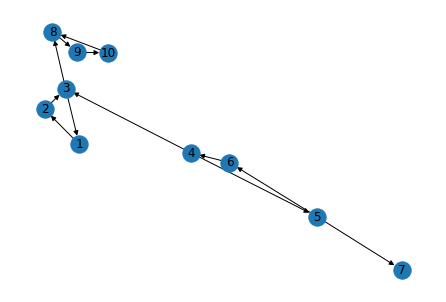

In [12]:
import networkx as nx
G = nx.DiGraph()
G.add_nodes_from(range(1,11))
nx.add_cycle(G,[1,2,3])
nx.add_cycle(G,[4,5,6])
nx.add_cycle(G,[8,9,10])
G.add_edges_from([(4,3), (3,8), (5,7), (7,7)])

# define pos according to spring layout
# to fix nodes' positions in all graph drawings.
# spring_layout positions nodes using Fruchterman-Reingold force-directed algorithm.
pos = nx.spring_layout(G)
nx.draw(G,pos, with_labels=True)

## Invariant probability distributions
In this section we show how to extract the characteristic matrices of a graph and how to compute the invariant distributions of it.

First we construct the weight matrix (called adjacency matrix in NetworkX) W, the degree matrix D and the normalized weight matrix P:

In [13]:
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
# convert W to a numpy array
W = W.toarray()
degrees = np.sum(W,axis=1)
print("Degrees",degrees)
D = np.diag(degrees)
print("D: \n",D)
# P = D^(-1) W
P = np.linalg.inv(D) @ W 
print("P: \n",P)

Degrees [1 1 2 2 2 1 1 1 1 1]
D: 
 [[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
P: 
 [[0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  0.5 0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.  0. ]]


Then we compute the invariant distributions of G, i.e., the normalized eigenvectors of P' relative to eigenvalue 1, which solve
$$
P' \pi = \pi, \quad \sum_i \pi_i = 1
$$ To do this, first we compute all eigenvalues and eigenvectors of P' with function `np.linalg.eig()`:

In [14]:
# eig(P.T) returns the eigenvalues (in vector w)
# and eigenvectors (in matrix v) of P'
w,v = np.linalg.eig(P.T)
print("eigenvalues:",w) # -> the 0th and 5th eigenvalues are 1

eigenvalues: [ 1.        +0.j         -0.5       +0.8660254j  -0.5       -0.8660254j
 -0.39685026+0.68736482j -0.39685026-0.68736482j  1.        +0.j
  0.79370053+0.j         -0.31498026+0.54556182j -0.31498026-0.54556182j
  0.62996052+0.j        ]


There are two eigenvalues equal 1 (in position 0 and 5 of `w`). We select the eigenvectors corresponding to the two occurrencies of eigenvalue 1 and we normalize them to obtain the two invariant distributions (`pi0` and `pi5`):

In [15]:
# we iterate over indices corresponding to eigenvalues 1
# i.e. corresponding to entries of w that are equal 1:
# for each index we extract the corresponding eigenvector in v
# and normalize it

# we use np.isclose() to compare eigenvalues to 1 to avoid
# numerical precision errors
for index in [i for i in range(len(G)) if np.isclose(w[i],1)]: 
    pi = v[:,index].real  # -> eigenvectors are complex but pi is real, so we convert it to real
    pi = pi/np.sum(pi)
    print("pi", index, "=", pi)

pi 0 = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
pi 5 = [-7.09180667e-17  2.02904469e-16  2.99431837e-16 -7.85046229e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.33333333e-01
  3.33333333e-01  3.33333333e-01]


#### Exercise
Perform the computation of the extremal eigenvectors of G looking at its condensation graph.

1. Find the attractive components of G
2. For each attractive component, construct the corresponding induced subgraph
3. Compute the P matrix of each sink and its invariant measure
4. Map the obtained measures back to the original graph G (by adding zeros in the appropriate positions)

**Hint**: exploit previous code and the code from Lab00.

In [ ]:
# TODO

Up to now we have exploited the function `numpy.linalg.eig` to compute all the eigenvalues and eigenvectors of P', and we have selected the leading ones. 
Another option is to apply an iterative method which converges to the leading eigenvector.

To see this, consider the following graph:

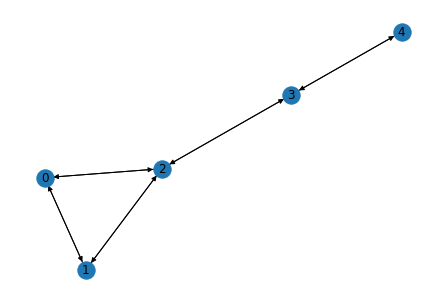

In [16]:
G = nx.lollipop_graph(3,2).to_directed()
nx.draw(G, with_labels=True)

G is strongly connected and aperiodic, as we can check calling

In [17]:
print("Is strongly connected:", nx.is_strongly_connected(G))
print("Is aperiodic:", nx.algorithms.dag.is_aperiodic(G))

Is strongly connected: True
Is aperiodic: True


so, as you will study, the flow dynamics defined as
$$
\begin{cases} 
x(t+1) = P'x(t) \\
x(0) = x_0
\end{cases}
$$
is guardanteed to converge. The limit of such dynamics is proportional to the invariant distribution of G, more precisely
$$
\lim_{t \to \infty} x(t) =\pi \mathbf{1}'x_0 
$$

So, by setting $ x_0 = \frac{1}{n} \mathbf{1} $ we obtain that
$$
\lim_{t \to \infty} x(t) =\pi 
$$
so that $x(t)$ approximates $\pi$ as $t$ grows larger.
Then we can compute $\pi$ by an iterative implementation of the flow dynamics.

In [18]:
# Compute the relevant matrices 

W = nx.adjacency_matrix(G) # -> returns type is scipy.sparse.csr_matrix
# convert W to a numpy array
W = W.toarray()
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# Simulate the evolution of the flow dynamics to approximate its limit

n_nodes = len(G)
# initial condition: 1/n-uniform vector of size n_nodes
x_0 = np.ones((n_nodes,1))/n_nodes
# set a tolerance to assess convergence to the limit
tol = 1e-5
# evolve the flow dynamics multiplying by P'
x_old = x_0
while True:
    x_new = P.T @ x_old
    if np.linalg.norm(x_new-x_old) < tol:
        break
    x_old=x_new
pi_approx = x_new
print("Approximation of pi: \n", pi_approx)

Approximation of pi: 
 [[0.20000061]
 [0.20000061]
 [0.29999751]
 [0.20000304]
 [0.09999823]]


We can check the accuracy of the approximation by comparing it to the invariant distribution found using the `numpy.linalg.eig` function:

In [19]:
# Compute the invariant distribution using eig()

values,vectors = np.linalg.eig(P.T)
# by assumption the 1 eigenvalue is unique
index = np.argmax(values.real) 
pi = vectors[:,index].real
pi = pi/np.sum(pi)
print("pi=", pi)

# Compute the approximation error as the difference between the two results
# pi_approx is a column, i.e. a 2 dimentional ndarray of shape (n_nodes,1), while pi is a row. 
# To take the difference we uniform shapes with .T (transpose)
error = np.linalg.norm(pi_approx.T-pi) 
print("Error:", error)

pi= [0.2 0.2 0.3 0.2 0.1]
Error: 4.391598368715531e-06


## Exercise
Adapt the previous iterative procedures to compute for the graph G
1. the Katz centrality 
$ z =  \frac{1-\beta}{\lambda_W} W' z + \beta \mu $
with $\mu = \mathbf{1}$ and $\beta=0.15$
2. and Bonachich centrality 
$ x = (1-\beta)P' x + \beta \mu $
with $\mu = \mathbf{1}$ and $\beta=0.15$ 
    - Check the result of point 2. using `networkx.algorithms.link_analysis.pagerank_alg.pagerank` (the Page Rank centrality is a special case of the Bonachich centrality where $\beta=0.15$ and $\mu = \mathbf{1}$).

In [ ]:
# TODO

# Visualizing centralities on graphs
We can compute centralities both using NetworkX algorithms and performing iterative procedures. It is important to make sense of the centrality vectors, and a usefull way to do this is by visualizing centralities on graphs.

## Small networks Example: Zachary's Karate Club
Zachary's Karate Club network is a well-know network example. This is a quite small network so we can compute centralities direcly. To better understand the meaning of centrality measure it is usefull to visualize them by producing appropriate graph representations.

Let's first load and visualize Zachary's Karate Club network:

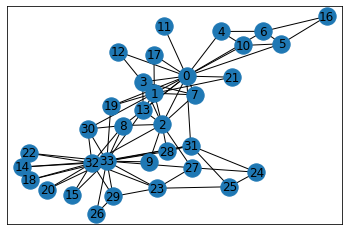

In [20]:
G = nx.karate_club_graph()
# Fix node positions on all pictures according to spring layout
pos = nx.spring_layout(G) 
nx.draw_networkx(G, pos)

Compute, for example, the degree centrality of G. The following code shows how to represent G so that nodes size and color reflects their centrality value:

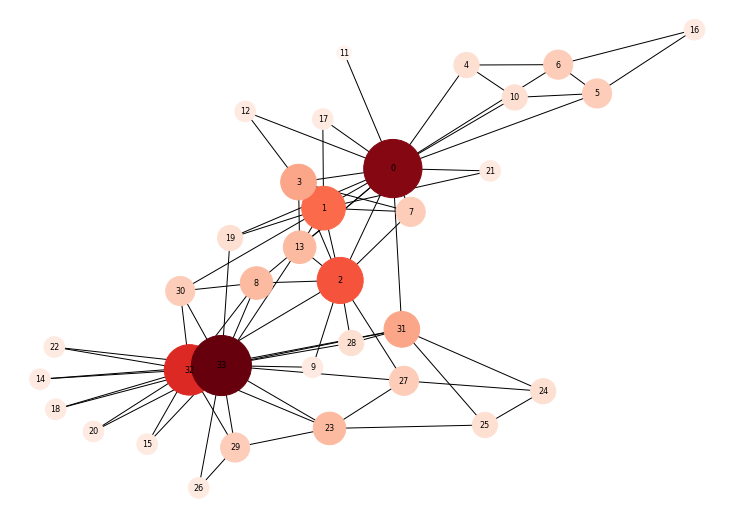

In [21]:
import matplotlib.pyplot as plt

# Degree centrality

# dc is a dictionary with nodes as keys and degree centralities as values
dc = nx.degree_centrality(G) 
plt.figure(1, figsize=(10,7))
nx.draw(G,pos,
         with_labels=True,
         # keys of dc are nodes
         nodelist=dc.keys(), 
         # node size is proportional to centrality value
         node_size = [d*7000 for d in dc.values()], 
         # node's color reflects centrality values (higher dc = darker color)
         node_color=list(dc.values()),
         font_size=8,
         # node's colors are on the red scale
         cmap=plt.cm.Reds) 

We repeat this proceadure with a different measure, eigenvector centrality:

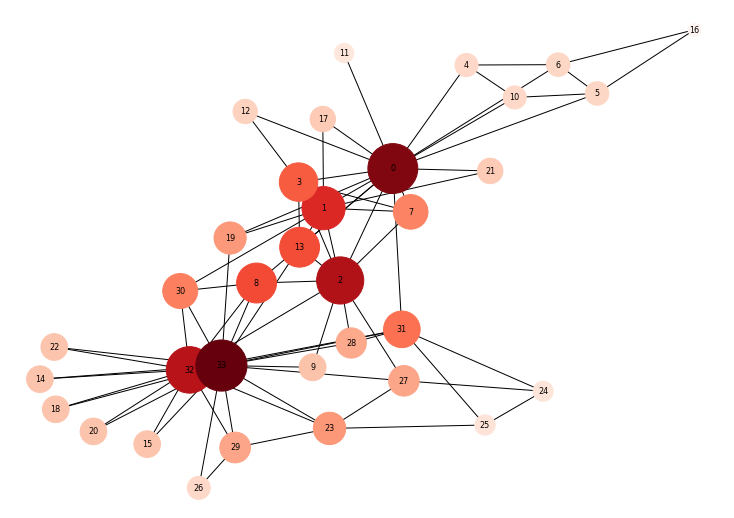

In [22]:
# Eigenvector centrality
ec = nx.eigenvector_centrality(G)
plt.figure(1, figsize=(10,7))
nx.draw(G, pos,
          with_labels=True,
          nodelist=ec.keys(),
          # node size is proportional to eigenvector centrality
          node_size = [d*7000 for d in ec.values()],  
          node_color=list(ec.values()),
          font_size=8,
          cmap=plt.cm.Reds,
          )

It is interesting to compare different centrality measures for the same graph and see how they are correlated. Below we visualize the correlation between degree centrality and eigenvector centrality of G:

Text(0, 0.5, 'Eigenvector Centrality')

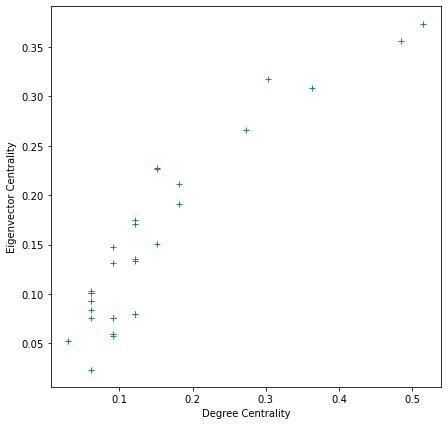

In [23]:
# Correlation degree-eigenvector

# x corresponds to degree centrality values
xdata = list(dc.values()) 
# y corresponds to eigenvector centrality values
ydata = list(ec.values()) 

plt.figure(1, figsize=(7,7))
# for each node, we plot an "+" with coordinates equal to the values of its
# degree and eigenvector centrality
plt.plot(xdata,ydata, '+') 
plt.xlabel('Degree Centrality')
plt.ylabel('Eigenvector Centrality')

The two centralities appear to be correlated for G. To explore this in more details it is usefull to add node ids, so that we can see which are the nodes with higher or lower correlation:

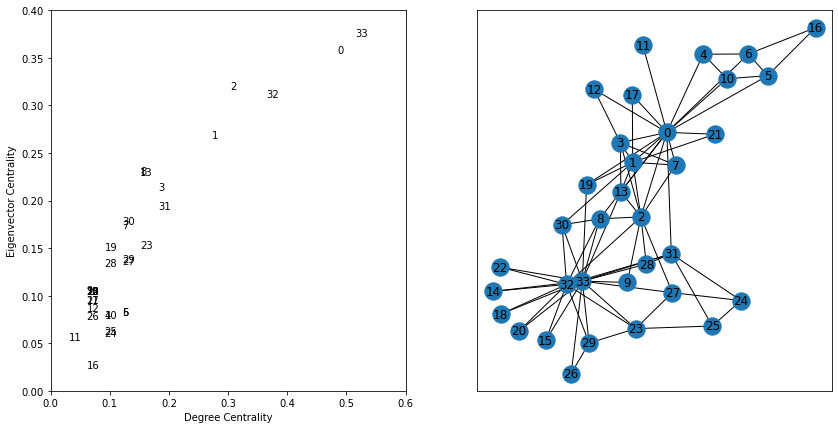

In [24]:
# Adding node ids:

# We define a figure and we construct two subplots: 
# on the left we plot the centralities correlation diagram
# with node labels, on the right we draw the graph 
# with same node labels
fig = plt.figure(1, figsize=(14,7))
# add_subplot() returns the axes of the subplot
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


for v in range(len(G)):
    # Axes.text(x,y,s) add the text s to Axes instance (i.e., to the subplot)
    # at location x, y. For each node v we plot 
    # node ids in position (xdata[v], ydata[v]) where xdata = list(dc.values())
    # and ydata = list(ec.values())
    ax1.text(x = xdata[v], y = ydata[v], s=str(v))
# we set the limits for x and y scales
ax1.set_xlim(0, 0.6)
ax1.set_ylim(0, 0.4)
ax1.set_xlabel('Degree Centrality')
ax1.set_ylabel('Eigenvector Centrality')

nx.draw_networkx(G, pos, ax=ax2)

### Exercise
Compare Katz and Bonacich centralities for G, reusing the code you made in the previous exercises.

In [ ]:
# TODO

# Testing sensitivity of measures
In this section we will check the dependence of centrality measures with respect to their paramenters and the sensitivity of the iterative algorithms to compute such measure with respect to the number of iterations.

## The effect of parameters
In our first experiment we analyze the dependence of Page Rank centrality on the parameter $\alpha$. We set any 3 distinct values for $\alpha$ while we fix the number of iterations, and run Page Rank. Then we plot the resulting Page Rank values with respect to $\alpha$.

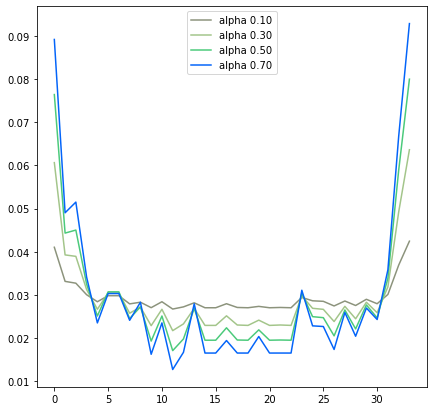

In [25]:
G = nx.karate_club_graph()

fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

# we consider values for alpha from 0.1 to 0.9 with step size 0.2
alphas = np.arange(0.1, 0.9, 0.2)

for alp in alphas:
    # pagerank has parameters alpha and mu:
    # note that alpha = 1-beta and weight parameters mu are set to 1 by default
    pr = nx.pagerank(G, alpha=alp) 
    prval = list(pr.values())
    ax.plot(prval, color=np.random.rand(3), label='alpha {0:.2f}'.format(alp))
    
ax.legend()

### Exercise:
1. explain the previous result. 

**Hint:** keep in mind that the parameter alpha used by `nx.pagerank` corresponds to $1-\beta$, where $\beta$ has the same meaning as in the lectures.
2. Repeat the analysis. This time keep alpha fixed to 0.5 and select 3 different non-uniform vectors $\mu$ as `personalization` parameter to `pagerank`. How do you interpret the result?

## The effect of iteration number
In this section we consider a bigger network and we analyse the speed of convergence of iterative algorithms for computing centrality measures. 
 

Download the [political blogs](http://networkdata.ics.uci.edu/data/polblogs/polblogs.gml) network (save it as a .gml file in the working directory of this notebook) and import it as a Graph object. We check the basic properties of G.


In [26]:
G = nx.read_gml('polblogs.gml')
print("Type of G:", type(G))

Type of G: <class 'networkx.classes.multidigraph.MultiDiGraph'>


G is a directed multigraph due to the presence of parallel links. To compute centrality measures we convert G to a directed graph by collapsing parallel edges summing their unitary weights.

In [28]:
GG = nx.Graph()
for n, nbrs in G.adjacency():
    # edict is a dictionary of dictionaries; 
    # the keys of edict are parallel edges from n to nbr;
    # the values of edict are dictionary,
    # containing attribute values of the corresponding edge
    for nbr, edict in nbrs.items(): 
        # each edge has weight=1, so total value is just  
        # the number of parallel edges
        total_value = len(edict) 
        GG.add_edge(n, nbr, weight = total_value)

We now test the convergence speed of `nx.pagerank` algorithm:

Errors: [0.0, 0.0, 0.0]


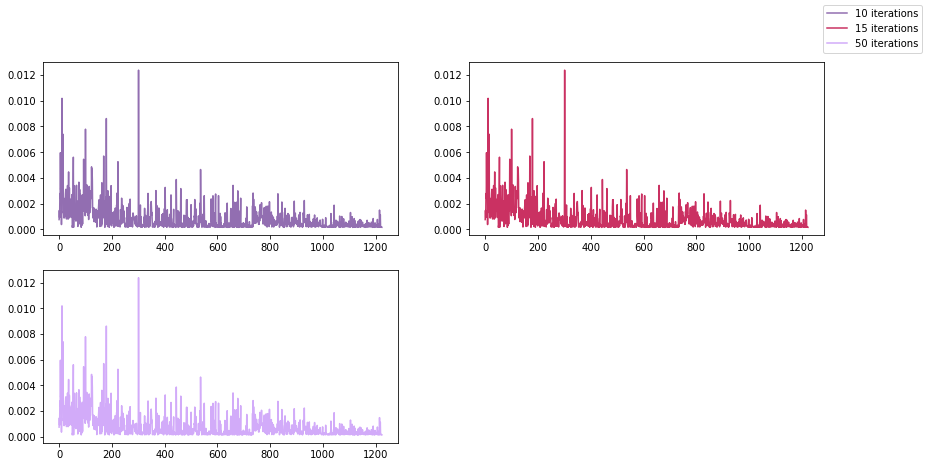

In [29]:
fig = plt.figure(1, figsize=(14,7))

# set 3 iteration numbers
iters = [10,15,50]
# define the position of the next plot in the subplot grid
position = 1
# create a list to collect the page rank values obtained in the three runs 
prvals = []

for max_iter in iters:
    pr = nx.pagerank(GG, max_iter = max_iter) 
    # compute page rank values
    prval = list(pr.values())
    # append the result to the list
    prvals.append(np.array(prval)) 
    # create a new sublot in the grid
    ax = fig.add_subplot(2,2,position)
    # plot the PR values
    ax.plot(prval, color=np.random.rand(3), label='{0:d} iterations'.format(max_iter))
    position+=1

# add a legend which contains all label
# informations specified in previous plot calls
fig.legend()  
# we assume the values obtained with nx.pagerank()
# with no iterations constraints as a benchmark
benchmark = np.array(list(nx.pagerank(GG).values())) 
# we compute errors as norm of the differences wrt the benchmark
errors = [np.linalg.norm(prval-benchmark) for prval in prvals]
print("Errors:", errors)

`nx.pagerank` algorithm converges very fast! 
### Exercise
Check if your iterative algorithm for computing Bonachich centrality is as good as this by performing a similar analysis.

In [ ]:
# TODO